In [33]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten
from tensorflow.python.keras.optimizers import gradient_descent_v2, adam_v2 
from datetime import datetime
import tensorboard
import tensorflow as tf
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
%load_ext tensorboard 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [35]:
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500) 

In [36]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [37]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [63]:
sample_numbers = [9, 333, 400, 505, 911]

In [97]:
samples = [X_test[num] for num in sample_numbers]
true_labels = [Y_test[num] for num in sample_numbers]

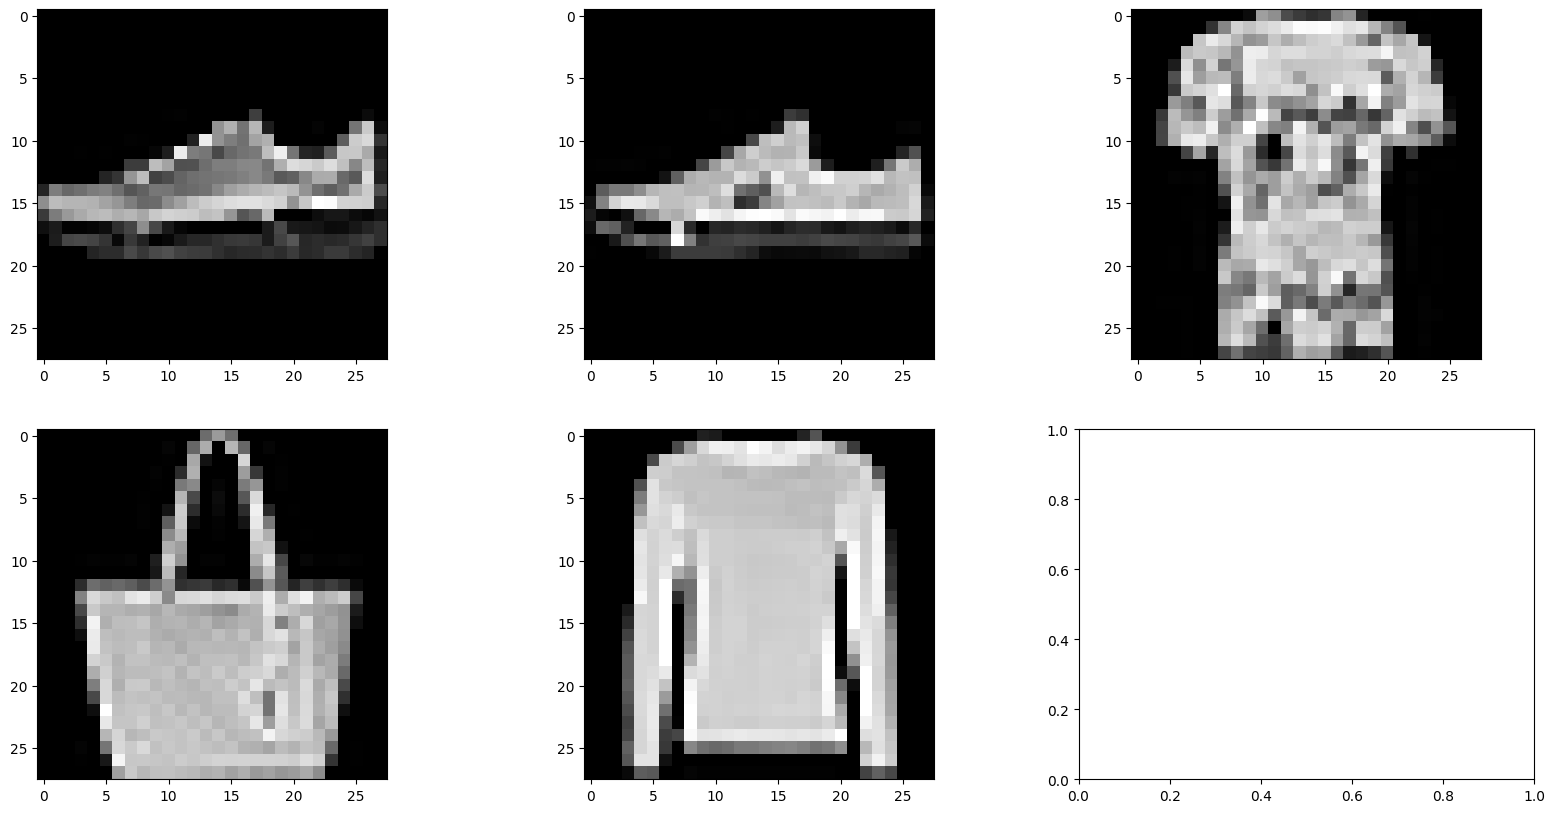

In [39]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))
for ax, sample in list(zip(ax.flatten(), samples)):
    img = np.array(sample, dtype='float')
    pixels = img.reshape((28, 28))
    ax.imshow(pixels, cmap='gray')
plt.show()

In [40]:
batch_size = 128
num_classes = 10
epochs = 20

In [41]:
di = {0: 'T-shirt',
      1: 'Trouser',
      2: 'Pullover',
      3: 'Dress',
      4: 'Coat',
      5: 'Sandal',
      6: 'Shirt',
      7: 'Sneaker',
      8: 'Bag',
      9: 'Ankle boot'}


In [42]:
def create_log_dir(s):
    return "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S") + f'_{str(s)}'
    

In [43]:
def train_model(model, name='model'):
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=create_log_dir(name))
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_test, Y_test), callbacks=[tensorboard_callback])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return history, model

In [44]:
# Single layer with 1 unit
model0 = Sequential()
model0.add(Flatten(input_shape=(28,28)))
model0.add(Dense(1, activation='relu', kernel_initializer='he_normal'))
model0.add(Dense(num_classes, activation='softmax'))
model0.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model0_history, model0 = train_model(model0, 'sl_1unit')

Test loss: 1.3129404783248901
Test accuracy: 0.4253000020980835


In [45]:
# Multiple Layers Without dropout
model3 = Sequential()
model3.add(Flatten(input_shape=(28,28)))
model3.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model3.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model3.add(Dense(num_classes, activation='softmax'))
model3.summary()
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3_history, model3 = train_model(model3, 'ml')


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.35528358817100525
Test accuracy: 0.8927000164985657


In [46]:
# Multiple Layers With dropout
model4 = Sequential()
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model4.add(Dropout(0.2))
model4.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model4.add(Dropout(0.2))
model4.add(Dense(num_classes, activation='softmax'))
model4.summary()
model4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model4_history, model4 = train_model(model4, 'ml_w_dropout')


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

In [109]:
#show predication graphs
def plot_image(predictions_array, true_label, img, model_name):
  plt.grid(False)
  plt.title(model_name)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(di[predicted_label],100*np.max(predictions_array),di[true_label]),color=color)
  plt.show()

In [110]:
def predict_and_plot(model, name):
    for sample, true_label in list(zip(samples, true_labels)):
        reshaped_img = np.expand_dims(sample, 0)
        prediction = model.predict(reshaped_img)
        plot_image(prediction, true_label, sample, name)

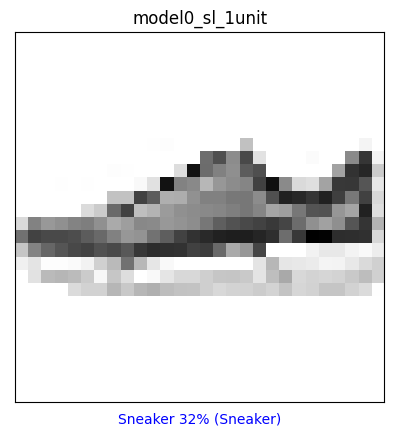

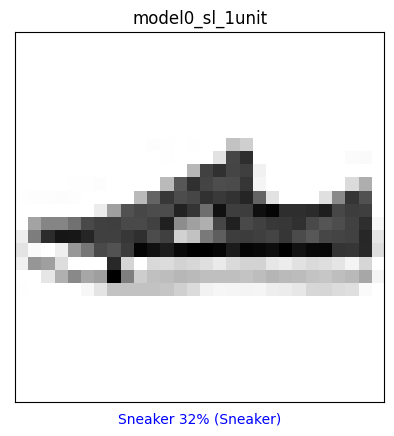

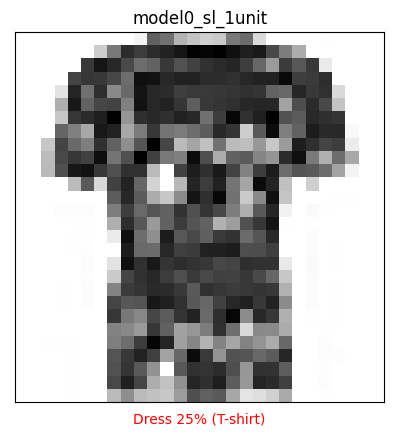

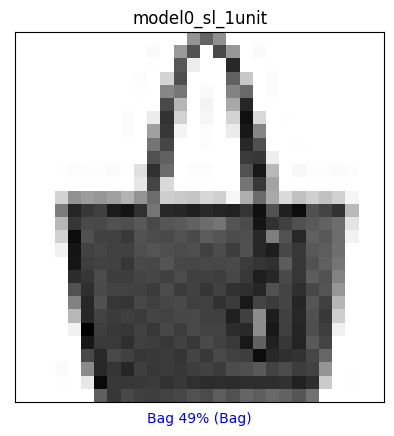

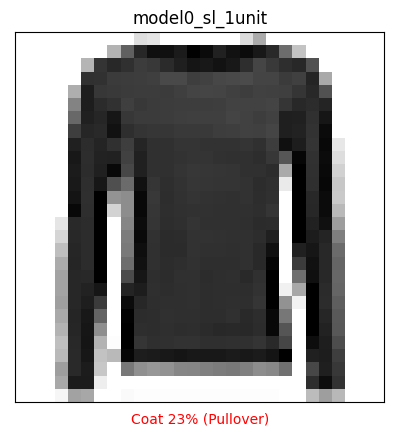

In [111]:
predict_and_plot(model0, 'model0_sl_1unit')

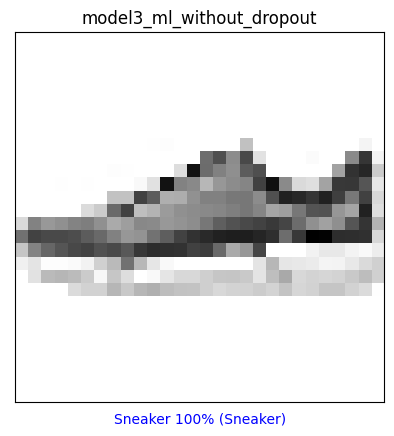

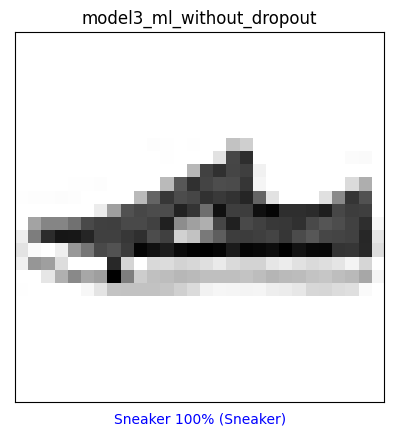

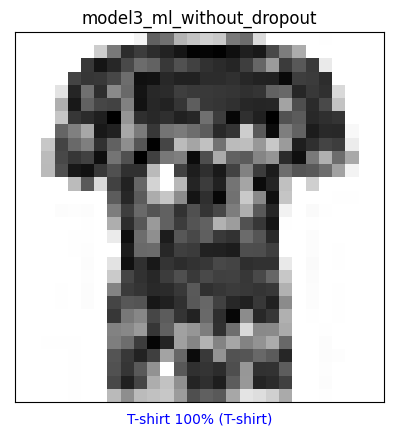

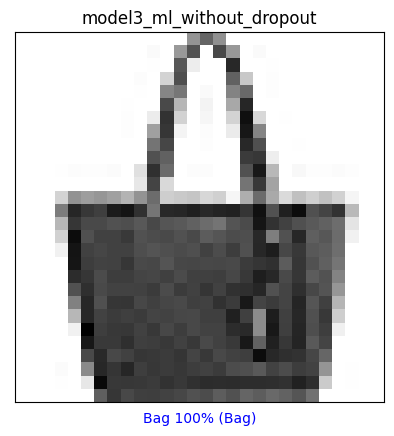

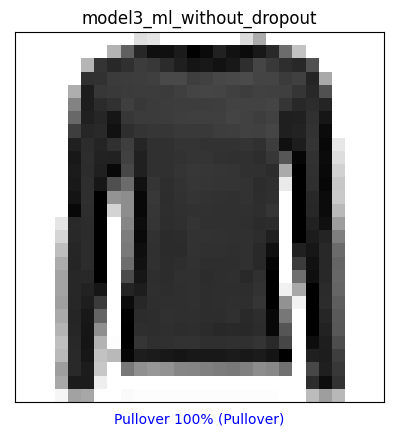

In [112]:
predict_and_plot(model3, 'model3_ml_without_dropout')

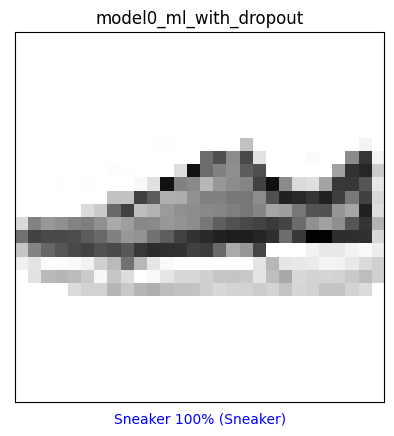

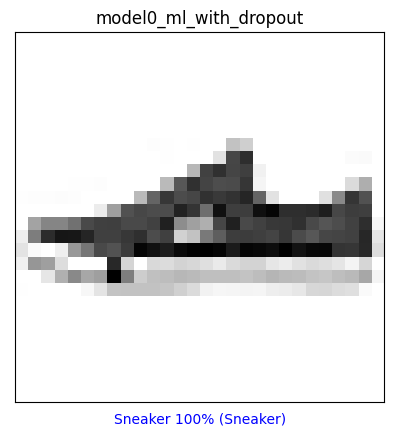

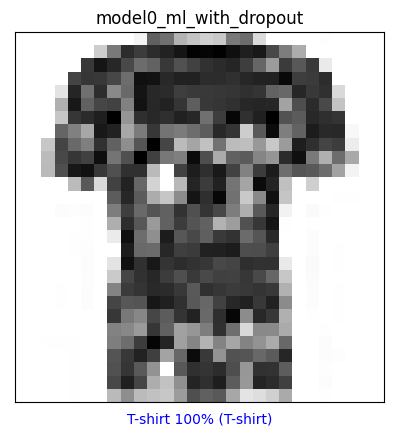

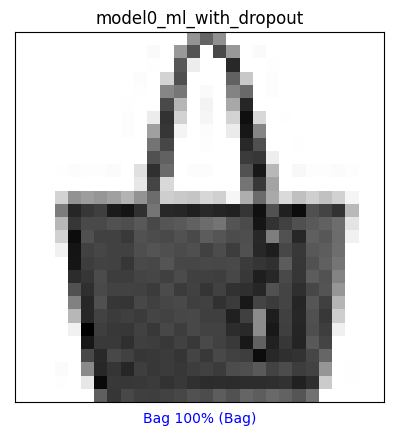

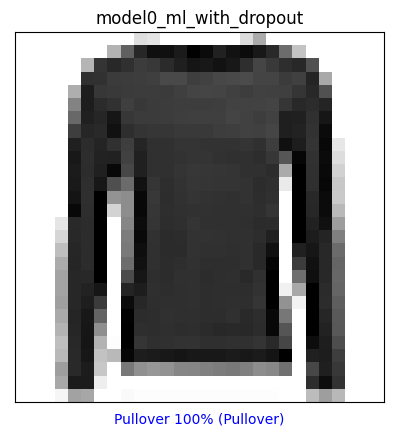

In [113]:
predict_and_plot(model4, 'model0_ml_with_dropout')